Dalam studi kasus kali ini kita akan melakukan analisis data untuk mencari informasi mengenai:

1. Jumlah host yang mendaftar dari tahun ke tahun
2. Jumlah host yang response ratenya diatas 70% di masing-masing tipe property
3. Distribusi response time host
4. Rata-rata review masing masing tipe property

In [135]:
#import library yang dibutuhkan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#abaikan warning
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

In [136]:
#read data
path_data = 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2022-09-07/data/listings.csv.gz'

data_airbnb = pd.read_csv(path_data)

data_airbnb.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20220907151523,2022-09-07,city scrape,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1,1,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36435,4.94358,Private room in rental unit,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",$49.00,3,28,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,1,9,14,14,2022-09-07,305,25,1,2009-03-30,2022-08-30,4.89,4.94,5.00,4.97,4.98,4.69,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.86
1,20168,https://www.airbnb.com/rooms/20168,20220907151523,2022-09-07,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Netherlands",+ (Phone number hidden by Airbnb),within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,5,5,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36407,4.89393,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Wifi"", ""Refrigerator"", ""TV"", ""Fire extinguis...",$106.00,1,365,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,0,0,0,2022-09-07,339,0,0,2010-03-02,2020-04-09,4.44,4.69,4.79,4.63,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.22
2,27886,https://www.airbnb.com/rooms/27886,20220907151523,2022-09-07,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Netherlands","Marjan works in ""eye"" the dutch filmmuseum, an...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/97647/profile...,https://a0.muscache.com/im/users/97647/profile...,Westelijke Eilanden,1,1,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-West,NaN,52.38761,4.89188,Private room in houseboat,Private room,2,NaN,1.5 baths,1.0,1.

In [137]:
#setting maksimal display
pd.set_option('display.max_columns', len(data_airbnb.columns))
pd.set_option('display.max_rows', 110)

In [138]:
data_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6893 non-null   int64  
 1   listing_url                                   6893 non-null   object 
 2   scrape_id                                     6893 non-null   int64  
 3   last_scraped                                  6893 non-null   object 
 4   source                                        6893 non-null   object 
 5   name                                          6893 non-null   object 
 6   description                                   6877 non-null   object 
 7   neighborhood_overview                         4628 non-null   object 
 8   picture_url                                   6893 non-null   object 
 9   host_id                                       6893 non-null   i

In [139]:
data_airbnb.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,6893.0,NaN,NaN,NaN,103931184171925760.0,237722178298429280.0,2818.0,14079338.0,31100723.0,50325628.0,709986109543860736.0
listing_url,6893,6893,https://www.airbnb.com/rooms/2818,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scrape_id,6893.0,NaN,NaN,NaN,20220907151523.0,0.0,20220907151523.0,20220907151523.0,20220907151523.0,20220907151523.0,20220907151523.0
last_scraped,6893,2,2022-09-07,6892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source,6893,2,city scrape,4332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,6893,6819,Residences | 2-Bedrooms | Serviced Apartment,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,6877,6777,"Museums, thrift shopping, and stroopwafels — y...",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood_overview,4628,4183,Traditionally a blue collar neighbourhood just...,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
picture_url,6893,6809,https://a0.muscache.com/pictures/d6ffe619-9708...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,6893.0,NaN,NaN,NaN,96268138.344117,127732747.524994,3159.0,9426449.0,33381838.0,135487531.0,478375422.0


In [140]:
#ambil kolom yang dibutuhkan saja
ncs_col = ["id",
        "host_name", 
        "host_since",
        "host_response_time",
        "host_response_rate",
        "property_type",
        "accommodates", 
        "bathrooms", 
        "bedrooms",
        "price",
        "number_of_reviews"]

data_filtered = data_airbnb[ncs_col]
data_filtered

,id,host_name,host_since,host_response_time,host_response_rate,property_type,accommodates,bathrooms,bedrooms,price,number_of_reviews
0,2818,Daniel,2008-09-24,within an hour,100%,Private room in rental unit,2,NaN,1.0,$49.00,305
1,20168,Alexander,2009-12-02,within an hour,100%,Private room in townhouse,2,NaN,1.0,$106.00,339
2,27886,Flip,2010-03-23,within an hour,100%,Private room in houseboat,2,NaN,1.0,$136.00,231
3,28871,Edwin,2010-05-13,within an hour,100%,Private room in rental unit,2,NaN,1.0,$75.00,428
4,29051,Edwin,2010-05-13,within an hour,100%,Private room in rental unit,1,NaN,1.0,$55.00,582
...,...,...,...,...,...,...,...,...,...,...,...
6888,12690380,Lennard,2014-05-03,within a few hours,100%,Entire townhouse,8,NaN,4.0,$300.00,28
6889,15005354,Gea,2015-10-13,within an hour,67%,Entire home,6,NaN,4.0,$195.00,18
6890,15171981,Ischa,2016-09-22,within an hour,100%,Entire home,6,NaN,4.0,$449.00,21
6891,17567812,Manon,2016-01-18,a few days or more,0%,Entire home,6,NaN,5.0,$282.00,8


In [141]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  6893 non-null   int64  
 1   host_name           6893 non-null   object 
 2   host_since          6893 non-null   object 
 3   host_response_time  5236 non-null   object 
 4   host_response_rate  5236 non-null   object 
 5   property_type       6893 non-null   object 
 6   accommodates        6893 non-null   int64  
 7   bathrooms           0 non-null      float64
 8   bedrooms            6578 non-null   float64
 9   price               6893 non-null   object 
 10  number_of_reviews   6893 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 592.5+ KB


- host_since seharusnya bertipe data tanggal
- host_response_rate bertipe numerik
- price harusnya bertipe data numerik

**HOST_SINCE**

In [142]:
#menangani host_since
data_filtered['host_since'].head()

0    2008-09-24
1    2009-12-02
2    2010-03-23
3    2010-05-13
4    2010-05-13
Name: host_since, dtype: object

karena pada data host_since diawali dengan tahun, maka kita lakukan parsing terhadap data tersebut

In [143]:
data_filtered['host_since'] = pd.to_datetime(data_filtered['host_since'], yearfirst=True)
data_filtered['host_since']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2636\2776898497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['host_since'] = pd.to_datetime(data_filtered['host_since'], yearfirst=True)


0      2008-09-24
1      2009-12-02
2      2010-03-23
3      2010-05-13
4      2010-05-13
          ...    
6888   2014-05-03
6889   2015-10-13
6890   2016-09-22
6891   2016-01-18
6892   2015-03-16
Name: host_since, Length: 6893, dtype: datetime64[ns]

**host_response_rate**

In [144]:
data_filtered['host_response_rate'].head()

0    100%
1    100%
2    100%
3    100%
4    100%
Name: host_response_rate, dtype: object

In [145]:
#agar bisa menjadi numerik, simbol % perlu dihapus 
data_filtered['host_response_rate'] = data_filtered['host_response_rate'].str.replace('%','')

#casting jadi integer
data_filtered['host_response_rate'] = data_filtered['host_response_rate'].astype(int)
data_filtered['host_response_rate'].head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2636\1944653490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['host_response_rate'] = data_filtered['host_response_rate'].str.replace('%','')


ValueError: cannot convert float NaN to integer

karena ada missing value, maka tidak bisa langsung di convert. Ubah missing value menjadi sebuah angka sehingga tipe data bisa diganti

In [146]:
#mengganti nan menjadi angka
data_filtered['host_response_rate'] = data_filtered['host_response_rate'].fillna(-21)

#mengganti tipe data menjadi integer
data_filtered['host_response_rate'] = data_filtered['host_response_rate'].astype(np.int64)

#kembalikan nilai nan
data_filtered['host_response_rate'].replace(-21, np.nan, inplace=True)

data_filtered['host_response_rate'].head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2636\1518025286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['host_response_rate'] = data_filtered['host_response_rate'].fillna(-21)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2636\1518025286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['host_response_rate'] = data_filtered['host_response_rate'].astype(np.int64)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2636\1518025286.py:8: SettingWithCopyWarning: 
A value is trying to be

0    100.0
1    100.0
2    100.0
3    100.0
4    100.0
Name: host_response_rate, dtype: float64

In [147]:
data_filtered['price'].head()
#agar menjadi numerik, hapus tanda $ dan , (ribu)
data_filtered['price'] = data_filtered['price'].str.replace("$","")
data_filtered['price'] = data_filtered['price'].str.replace(",","")

#ubah data menjadi numerik
data_filtered['price'] = data_filtered['price'].astype(float)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2636\1221494298.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['price'] = data_filtered['price'].str.replace("$","")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2636\1221494298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['price'] = data_filtered['price'].str.replace(",","")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2636\1221494298.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [148]:
data_filtered['price'].describe()

count    6893.000000
mean      218.487306
std       192.576328
min         0.000000
25%       125.000000
50%       180.000000
75%       264.000000
max      7900.000000
Name: price, dtype: float64

==== HANDLING MISSING VALUES ====

In [149]:
#cek missing value
nan_col = data_filtered.isna().sum().sort_values(ascending=False)

#persentase missing value
persen_nan_col = nan_col/len(data_filtered)*100
persen_nan_col

bathrooms             100.000000
host_response_time     24.038880
host_response_rate     24.038880
bedrooms                4.569853
id                      0.000000
host_name               0.000000
host_since              0.000000
property_type           0.000000
accommodates            0.000000
price                   0.000000
number_of_reviews       0.000000
dtype: float64

In [150]:
#ambil kolom yang memiliki missing value
col_with_nan = persen_nan_col[persen_nan_col>0]
col_with_nan = pd.DataFrame(col_with_nan, columns=['persentase'])
col_with_nan

,persentase
bathrooms,100.000000
host_response_time,24.038880
host_response_rate,24.038880
bedrooms,4.569853


In [151]:
#buang kolom yang persentasenya lebih besar dari 90
abv90 = col_with_nan[col_with_nan['persentase']>90].index

data_filtered = data_filtered.drop(columns=abv90)
data_filtered

,id,host_name,host_since,host_response_time,host_response_rate,property_type,accommodates,bedrooms,price,number_of_reviews
0,2818,Daniel,2008-09-24,within an hour,100.0,Private room in rental unit,2,1.0,49.0,305
1,20168,Alexander,2009-12-02,within an hour,100.0,Private room in townhouse,2,1.0,106.0,339
2,27886,Flip,2010-03-23,within an hour,100.0,Private room in houseboat,2,1.0,136.0,231
3,28871,Edwin,2010-05-13,within an hour,100.0,Private room in rental unit,2,1.0,75.0,428
4,29051,Edwin,2010-05-13,within an hour,100.0,Private room in rental unit,1,1.0,55.0,582
...,...,...,...,...,...,...,...,...,...,...
6888,12690380,Lennard,2014-05-03,within a few hours,100.0,Entire townhouse,8,4.0,300.0,28
6889,15005354,Gea,2015-10-13,within an hour,67.0,Entire home,6,4.0,195.0,18
6890,15171981,Ischa,2016-09-22,within an hour,100.0,Entire home,6,4.0,449.0,21
6891,17567812,Manon,2016-01-18,a few days or more,0.0,Entire home,6,5.0,282.0,8


In [152]:
#cek data pada 3 kolom yang masih memiliki nan
data_filtered[['host_response_time', 'host_response_rate', 'bedrooms']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   host_response_time  5236 non-null   object 
 1   host_response_rate  5236 non-null   float64
 2   bedrooms            6578 non-null   float64
dtypes: float64(2), object(1)
memory usage: 161.7+ KB


In [153]:
data_filtered['host_response_time']

0           within an hour
1           within an hour
2           within an hour
3           within an hour
4           within an hour
               ...        
6888    within a few hours
6889        within an hour
6890        within an hour
6891    a few days or more
6892          within a day
Name: host_response_time, Length: 6893, dtype: object

In [154]:
#data pada host_response_time bersifat kategorik sehingga penanganan yang cocok adalah menggunakan modus
data_filtered['host_response_time'].unique()

array(['within an hour', 'within a few hours', nan, 'within a day',
       'a few days or more'], dtype=object)

In [155]:
data_filtered['host_response_time'].value_counts()

host_response_time
within an hour        2942
within a few hours    1251
within a day           939
a few days or more     104
Name: count, dtype: int64

In [156]:
#data pada bedrooms bersifat kategorik sehingga penanganan yang cocok adalah menggunakan modus
data_filtered['bedrooms'].unique()

array([ 1.,  2., nan,  4.,  5., 10.,  3.,  7.,  6.,  8., 17.])

In [157]:
data_filtered['bedrooms'].value_counts()

bedrooms
1.0     4004
2.0     1598
3.0      676
4.0      238
5.0       46
6.0        6
10.0       4
8.0        4
7.0        1
17.0       1
Name: count, dtype: int64

In [158]:
modus_hrt = data_filtered['host_response_time'].mode()[0]
modus_bedrooms = data_filtered['bedrooms'].mode()[0]

data_filtered['host_response_time'] = data_filtered['host_response_time'].fillna(modus_hrt)
data_filtered['bedrooms'] = data_filtered['bedrooms'].fillna(modus_hrt)

In [159]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  6893 non-null   int64         
 1   host_name           6893 non-null   object        
 2   host_since          6893 non-null   datetime64[ns]
 3   host_response_time  6893 non-null   object        
 4   host_response_rate  5236 non-null   float64       
 5   property_type       6893 non-null   object        
 6   accommodates        6893 non-null   int64         
 7   bedrooms            6893 non-null   object        
 8   price               6893 non-null   float64       
 9   number_of_reviews   6893 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 538.6+ KB


<Axes: xlabel='host_response_rate', ylabel='Count'>

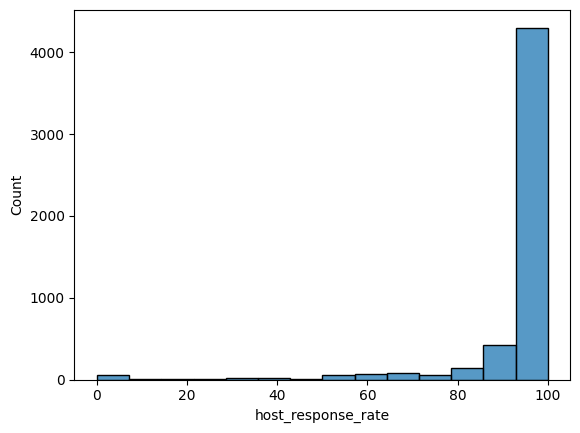

In [160]:
#host_response_rate masih memiliki missing value
#sebelum menentukan mean atau median yang digunakan lihat dulu sebaran datanya
sns.histplot(data_filtered, x='host_response_rate')

In [161]:
#dari sebaran data diputuskan menggunakan median
data_filtered['host_response_rate'] = data_filtered['host_response_rate'].fillna(data_filtered['host_response_rate'].median())
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6893 entries, 0 to 6892
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  6893 non-null   int64         
 1   host_name           6893 non-null   object        
 2   host_since          6893 non-null   datetime64[ns]
 3   host_response_time  6893 non-null   object        
 4   host_response_rate  6893 non-null   float64       
 5   property_type       6893 non-null   object        
 6   accommodates        6893 non-null   int64         
 7   bedrooms            6893 non-null   object        
 8   price               6893 non-null   float64       
 9   number_of_reviews   6893 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 538.6+ KB


=== CEK DATA DUPLIKAT ===

In [162]:
data_filtered[data_filtered.duplicated()]

,id,host_name,host_since,host_response_time,host_response_rate,property_type,accommodates,bedrooms,price,number_of_reviews


=== CEK KONSISTENSI ===

In [163]:
#kita cek pada kolom property_type
data_filtered['property_type'].unique()

array(['Private room in rental unit', 'Private room in townhouse',
       'Private room in houseboat', 'Entire rental unit',
       'Entire guest suite', 'Private room in bed and breakfast',
       'Entire loft', 'Private room in home', 'Entire guesthouse',
       'Private room in boat', 'Entire townhouse',
       'Room in boutique hotel', 'Entire condo', 'Private room in loft',
       'Private room in guest suite', 'Entire home', 'Boat',
       'Private room in farm stay', 'Houseboat',
       'Room in bed and breakfast', 'Private room in condo',
       'Entire chalet', 'Private room in guesthouse',
       'Shared room in rental unit', 'Shared room in home',
       'Private room in island', 'Entire villa', 'Private room in villa',
       'Private room in tiny home', 'Private room in casa particular',
       'Entire serviced apartment', 'Barn', 'Private room in bungalow',
       'Entire cabin', 'Room in hotel', 'Entire place',
       'Private room in serviced apartment', 'Room in aparth

Dari data diatas

- Jumlah kategori properti cukup banyak yaitu 62.
- Beberapa property type memiliki kata yang sama, seperti private room, shared room dll.

Kita akan mereduksi jumlah kategori ini, dengan cara:

- Jika kategori mengandung kata Private room makan akan dijadikan kategori private room
- Jika kategori mengandung kata Shared room makan akan dijadikan kategori shared room
- Jika kategori mengandung kata Entire makan akan dijadikan kategori Entire Home/apt
- Selain itu diganti menjadi others

In [183]:
# menyeragamkan kategori yang mengandung private room
data_filtered['property_type'] = data_filtered['property_type'].apply(lambda x : 'private room' if 'Private room' in x else x)

# menyeragamkan kategori yang mengandung shared room
data_filtered['property_type'] = data_filtered['property_type'].apply(lambda x: "shared room" if "Shared room" in x else x)

# menyeragamkan kategori yang mengandung Entire
data_filtered['property_type'] = data_filtered['property_type'].apply(lambda x: "entire Home/apt" if "Entire" in x else x)

#kategori lain
data_filtered['property_type'] = data_filtered['property_type'].apply(lambda x: "other" if ("entire" not in x 
                                                                                           and  "private" not in x  
                                                                                            and "shared" not in x) else x)

In [185]:
#kita cek pada kolom property_type
data_filtered['property_type'].nunique()

4

=== HANDLING OUTLIER ===

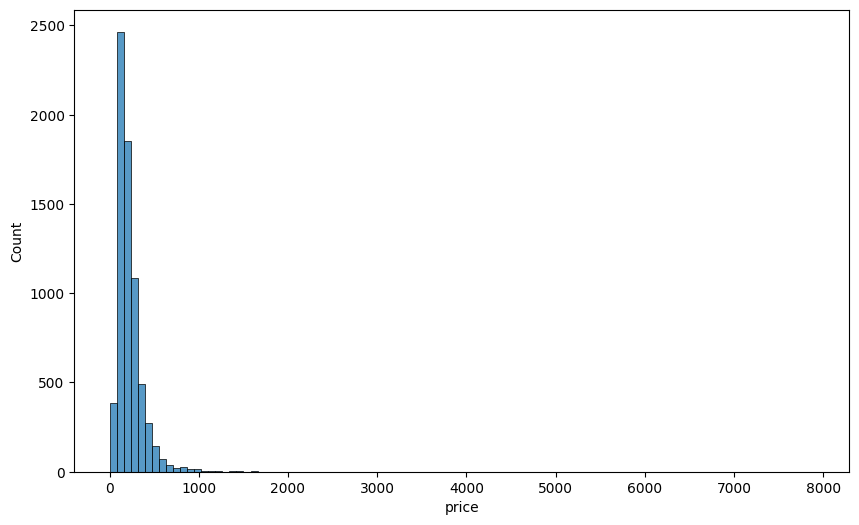

In [186]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = data_filtered, 
             x = "price", 
             bins = 100,
             ax = ax)

plt.show()

In [188]:
# Deskripsi statistik dari kolom price
data_filtered["price"].describe()

count    6893.000000
mean      218.487306
std       192.576328
min         0.000000
25%       125.000000
50%       180.000000
75%       264.000000
max      7900.000000
Name: price, dtype: float64

Terlihat nilai maksimum dari kolom price berada di angka 7900.
Angka ini sangat jauh dibanding nilai Q3 sebesar 264.
Data di atas Q3 memiliki potensi sebagai outlier
Kita asumsikan memang ada outlier

In [190]:
#diasumsikan angka di atas Q3 adalah outlier
Q1 = data_filtered['price'].quantile(0.25)
Q3 = data_filtered['price'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = IQR * 1.5 + Q3

#ambil data yang berada di bawah batas atas
data_filtered = data_filtered[data_filtered['price']<batas_atas]
data_filtered['price'].describe()

count    6543.000000
mean      192.239034
std        92.366092
min         0.000000
25%       120.000000
50%       175.000000
75%       250.000000
max       471.000000
Name: price, dtype: float64

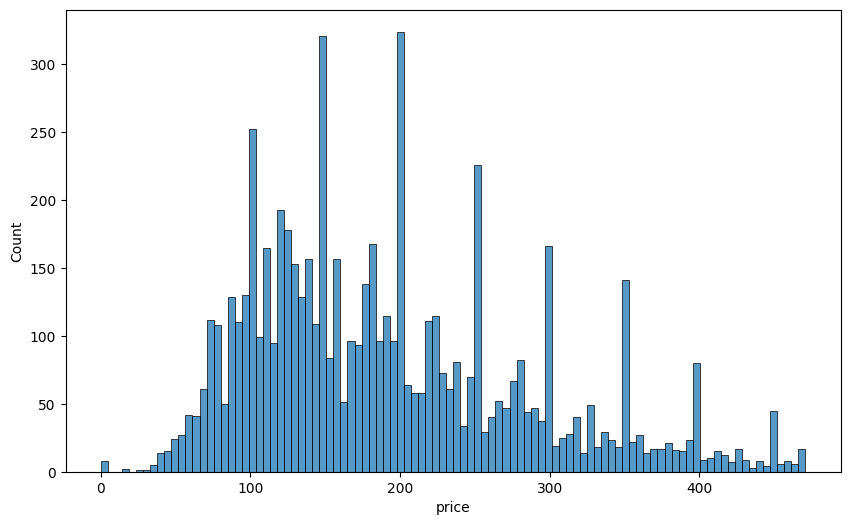

In [191]:
# Buat figure & axes
fig, ax = plt.subplots(figsize = (10, 6))

# Buat histogram plot price
sns.histplot(data = data_filtered, 
             x = "price", 
             bins = 100,
             ax = ax)

plt.show()

Dalam studi kasus kali ini kita akan mencari informasi:
1. Jumlah host yang mendaftar dari tahun ke tahun
2. Jumlah host yang response ratenya diatas 70% di masing-masing tipe property
3. Distribusi response time host
4. Rata-rata review masing masing tipe property

=== NOMOR 1 ===

In [193]:
data_filtered.head()

,id,host_name,host_since,host_response_time,host_response_rate,property_type,accommodates,bedrooms,price,number_of_reviews
0,2818,Daniel,2008-09-24,within an hour,100.0,private room,2,1.0,49.0,305
1,20168,Alexander,2009-12-02,within an hour,100.0,private room,2,1.0,106.0,339
2,27886,Flip,2010-03-23,within an hour,100.0,private room,2,1.0,136.0,231
3,28871,Edwin,2010-05-13,within an hour,100.0,private room,2,1.0,75.0,428
4,29051,Edwin,2010-05-13,within an hour,100.0,private room,1,1.0,55.0,582


In [194]:
#ekstrak informasi tahun
data_filtered['year'] = data_filtered['host_since'].dt.year
data_filtered.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2636\503267443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['year'] = data_filtered['host_since'].dt.year


,id,host_name,host_since,host_response_time,host_response_rate,property_type,accommodates,bedrooms,price,number_of_reviews,year
0,2818,Daniel,2008-09-24,within an hour,100.0,private room,2,1.0,49.0,305,2008
1,20168,Alexander,2009-12-02,within an hour,100.0,private room,2,1.0,106.0,339,2009
2,27886,Flip,2010-03-23,within an hour,100.0,private room,2,1.0,136.0,231,2010
3,28871,Edwin,2010-05-13,within an hour,100.0,private room,2,1.0,75.0,428,2010
4,29051,Edwin,2010-05-13,within an hour,100.0,private room,1,1.0,55.0,582,2010


In [197]:
#jumlah host yang mendaftar tiap tahun
host_per_year = data_filtered.groupby("year").count()
host_per_year[['id']]

,id
year,
2008,2
2009,3
2010,42
2011,184
2012,617
2013,996
2014,1093
2015,966
2016,847


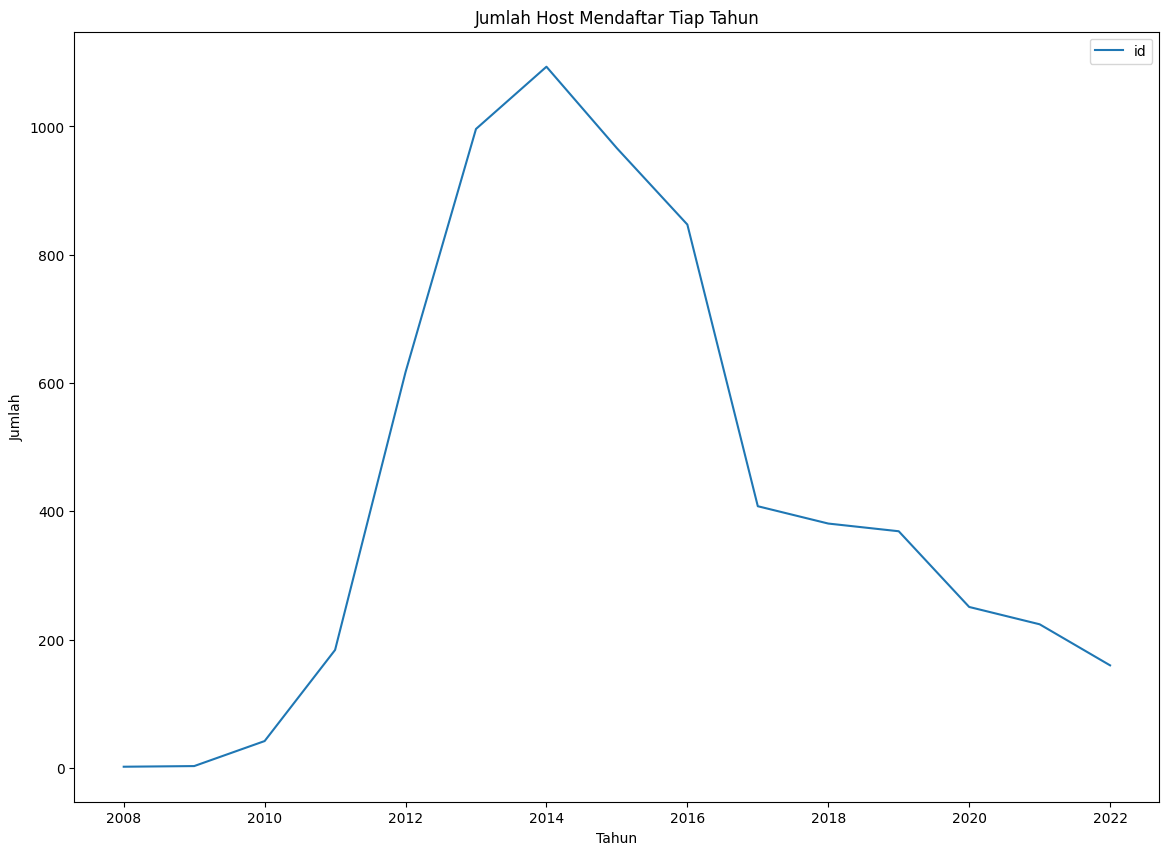

In [201]:
#visualisasi
fig, ax = plt.subplots(figsize=(14,10))

sns.lineplot(host_per_year[['id']], ax=ax)

ax.set_title('Jumlah Host Mendaftar Tiap Tahun')
ax.set_xlabel('Tahun')
ax.set_ylabel('Jumlah')

plt.show()

Dari visualisasi diatas:
- Mulai tahun 2010 banyak host yang mulai mendaftarkan propertinya ke Air BnB hingga mencapai puncak tertinggi di tahun 2014 sebanyak 1142 Host baru.
- Setelah tahun 2014 hingga 2022, jumlah host baru yang terdaftar mulai berkurang

=== NOMER 2 ===

In [203]:
# filter data berdasarkan persentase response
response_abv_70 = data_filtered[data_filtered["host_response_rate"] > 70]
n_response_abv_70_by_property_type = response_abv_70.groupby("property_type").count()[["id"]].reset_index()
n_response_abv_70_by_property_type

,property_type,id
0,entire Home/apt,4177
1,other,492
2,private room,1566
3,shared room,35


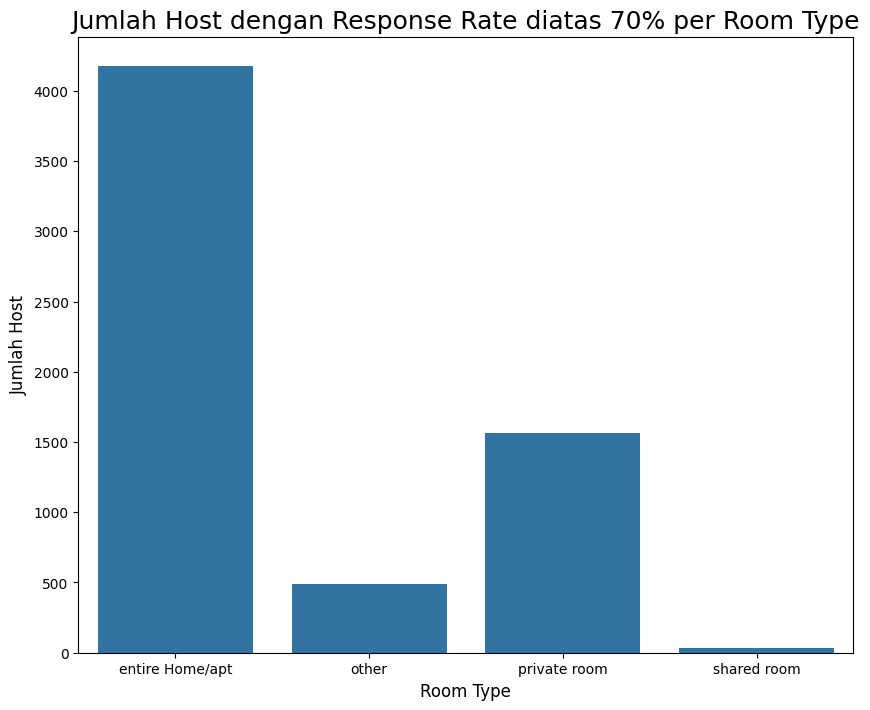

In [204]:
# customer ukuran figure
fig, ax = plt.subplots(figsize=(10, 8))

# membuat plot
sns.barplot(data=n_response_abv_70_by_property_type, x="property_type", y="id", ax=ax)

# menambahkan judul
ax.set_title("Jumlah Host dengan Response Rate diatas 70% per Room Type", fontsize=18)

# menambahkan label
ax.set_xlabel("Room Type", fontsize=12)
ax.set_ylabel("Jumlah Host", fontsize=12)

plt.show()

Dari data diatas:
- Host yang memiliki kategori property entire home/apt memiliki response rate yang paling tinggi dibanding yang lain
- Hanya sedikit host yang memiliki kategori properti shared room yang memiliki response rate diatas 70%

=== NOMER 3 ===

In [205]:
# Menghitung jumlah masing-masing response time
n_response_time = data_filtered.groupby("host_response_time").count()[["id"]].reset_index()
n_response_time

,host_response_time,id
0,a few days or more,97
1,within a day,883
2,within a few hours,1161
3,within an hour,4402


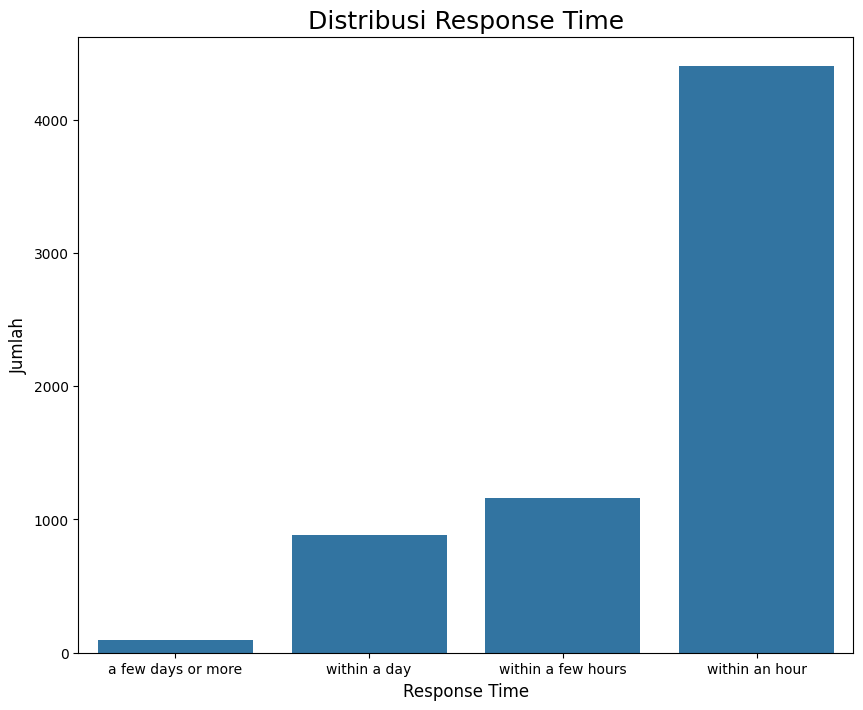

In [206]:
# customer ukuran figure
fig, ax = plt.subplots(figsize=(10, 8))

# membuat plot
sns.barplot(data=n_response_time, x="host_response_time", y="id", ax=ax)

# menambahkan judul
ax.set_title("Distribusi Response Time", fontsize=18)

# menambahkan label
ax.set_xlabel("Response Time", fontsize=12)
ax.set_ylabel("Jumlah", fontsize=12)

plt.show()

Dari data diatas:
- Sebagian besar host merespon dalam kurun waktu satu jam

=== NOMER 4 ===


In [224]:
data_filtered.groupby('property_type').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [222]:
# rata-rata jumlah review tiap room type
data_filtered.groupby('property_type').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
[["number_of_reviews"]].reset_index()
mean_review_by_room_type